#Mobile Price Classifier

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
#setting max_column option 
#pd.set_option('display.max_columns',40)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Training Dataset

In [ ]:
df_train=pd.read_csv('/content/drive/MyDrive/ML_project/train.csv')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
df_train.sample(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1654,1727,1,2.1,1,10,0,57,0.3,158,6,...,376,1288,512,5,2,6,0,0,0,0
1393,1444,1,2.1,1,0,0,6,0.9,103,1,...,1274,1340,712,17,5,10,0,0,0,0
851,757,0,2.3,1,5,1,58,0.2,163,4,...,535,697,3237,19,12,9,1,0,1,2
517,1059,0,2.4,0,8,0,61,0.1,134,3,...,1613,1916,3716,15,13,11,1,1,0,3
1787,1830,1,1.0,0,7,1,47,0.3,117,1,...,1191,1882,3362,13,10,11,1,0,0,3


# Balanced Dataset

In [ ]:
df_train['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [ ]:
categorical_features=['blue','dual_sim','four_g','three_g','touch_screen','wifi','price_range']
numerical_features=[i for i in df_train.columns if i not in categorical_features]

# checking whether there are missing values

In [ ]:
df_train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
for i in categorical_features:
    print(i,df_train[i].unique())

blue [0 1]
dual_sim [0 1]
four_g [0 1]
three_g [0 1]
touch_screen [0 1]
wifi [1 0]
price_range [1 2 3 0]


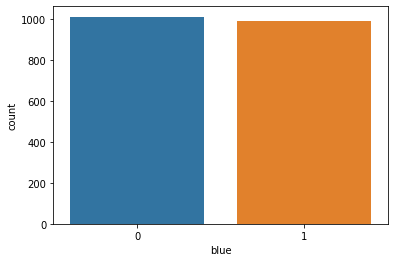

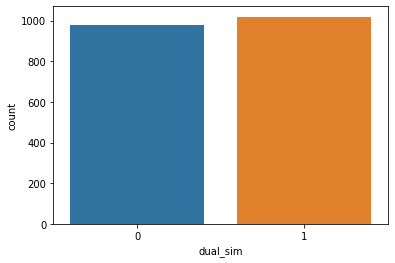

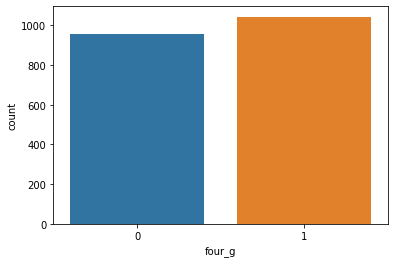

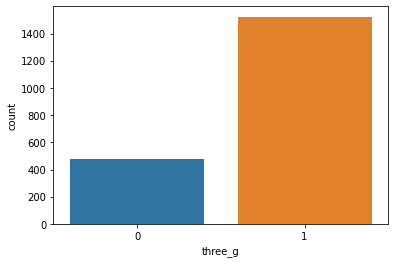

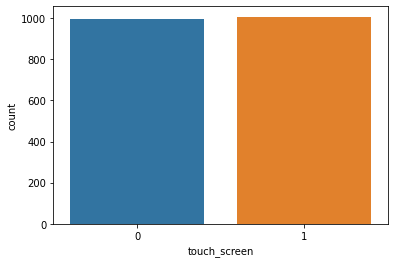

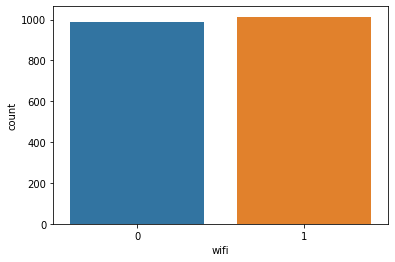

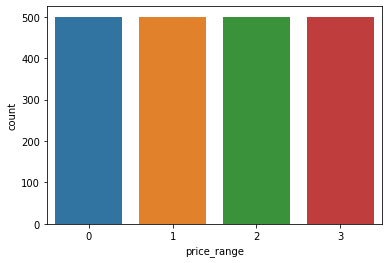

In [ ]:
for i in categorical_features:
    sns.countplot(data=df_train,x=i)
    plt.show()

<Axes: >

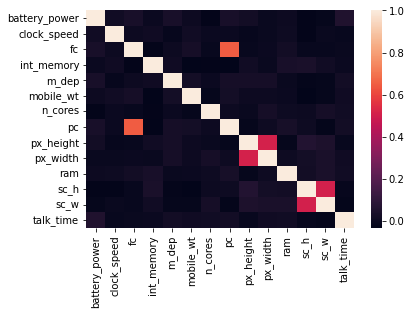

In [ ]:
sns.heatmap(df_train[numerical_features].corr())

# there is some high correlation between pc,fc ; sc_h and sc_w

In [ ]:
X=df_train.drop('price_range',axis=1)
y=df_train['price_range']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay,confusion_matrix, accuracy_score
def evaluate(y,pred_y,model):
    print(f'Accuracy: {accuracy_score(y,pred_y)}')
    print(f'Confusion matrix and classification report')
    print(classification_report(y,pred_y))
    display=ConfusionMatrixDisplay(confusion_matrix(y,pred_y),display_labels=model.classes_)
    _=display.plot()

In [ ]:
from sklearn.pipeline import Pipeline

KNN_model on training set
Accuracy: 0.9475
Confusion matrix and classification report
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       395
           1       0.93      0.94      0.93       409
           2       0.93      0.93      0.93       408
           3       0.99      0.93      0.96       388

    accuracy                           0.95      1600
   macro avg       0.95      0.95      0.95      1600
weighted avg       0.95      0.95      0.95      1600



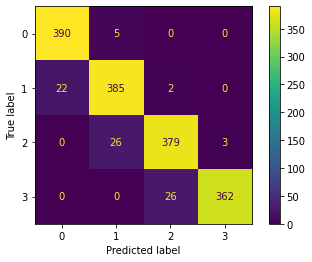

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model=Pipeline(steps=[('classifier',KNeighborsClassifier(n_neighbors=4,leaf_size=25))])
KNN_model.fit(X_train,y_train)

y_train_pred=KNN_model.predict(X_train)
print('KNN_model on training set')
evaluate(y_train,y_train_pred,KNN_model)

KNN_model on validation set
Accuracy: 0.93
Confusion matrix and classification report
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       105
           1       0.90      0.95      0.92        91
           2       0.85      0.91      0.88        92
           3       1.00      0.88      0.94       112

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



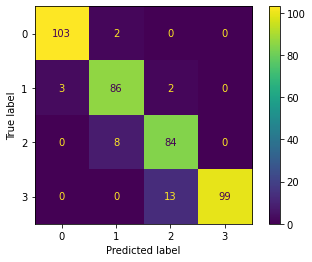

In [ ]:
print('KNN_model on validation set')
y_valid_pred=KNN_model.predict(X_valid)
evaluate(y_valid,y_valid_pred,KNN_model)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params={'classifier__n_neighbors':list(range(1,10)),
    'classifier__leaf_size':list(range(20,30))}

grid_search=GridSearchCV(KNN_model,param_grid=params,cv=5)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier',
                                        KNeighborsClassifier(leaf_size=25,
                                                             n_neighbors=4))]),
             param_grid={'classifier__leaf_size': [20, 21, 22, 23, 24, 25, 26,
                                                   27, 28, 29],
                         'classifier__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                     9]})

In [ ]:
grid_search.best_params_

{'classifier__leaf_size': 20, 'classifier__n_neighbors': 9}

KNN_model on training set
Accuracy: 0.953125
Confusion matrix and classification report
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       395
           1       0.94      0.95      0.94       409
           2       0.93      0.93      0.93       408
           3       0.97      0.96      0.96       388

    accuracy                           0.95      1600
   macro avg       0.95      0.95      0.95      1600
weighted avg       0.95      0.95      0.95      1600

KNN_model on validation set
Accuracy: 0.955
Confusion matrix and classification report
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       105
           1       0.93      0.95      0.94        91
           2       0.91      0.93      0.92        92
           3       1.00      0.94      0.97       112

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted a

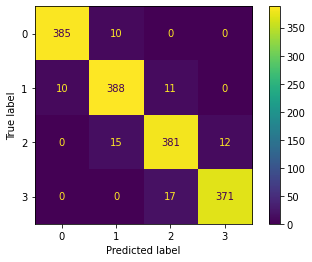

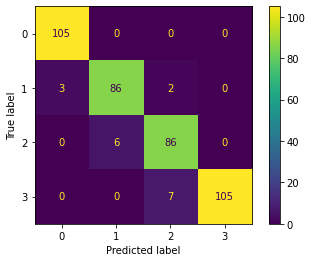

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model=Pipeline(steps=[('classifier',KNeighborsClassifier(n_neighbors=9,leaf_size=20))])
KNN_model.fit(X_train,y_train)

y_train_pred=KNN_model.predict(X_train)
print('KNN_model on training set')
evaluate(y_train,y_train_pred,KNN_model)
print('KNN_model on validation set')
y_valid_pred=KNN_model.predict(X_valid)
evaluate(y_valid,y_valid_pred,KNN_model)

In [ ]:
X_test=pd.read_csv('/content/drive/MyDrive/ML_project/test.csv')

In [ ]:
X_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [ ]:
X_test.drop('id',axis=1,inplace=True)

In [ ]:
y_test_predicted=KNN_model.predict(X_test)

<Axes: ylabel='count'>

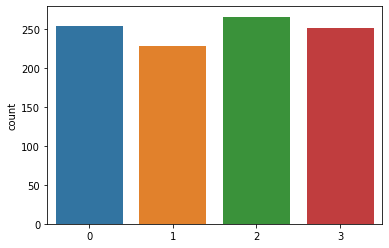

In [ ]:
sns.countplot(x=y_test_predicted)